In [5]:
import numpy as np
import pandas as pd
import networkx as nx
import os
from joblib import Parallel, delayed
os.system("taskset -p 0xff %d" % os.getpid())



# Plotting Stuff
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Colors
sns.set()
sns.set_style("white")

In [6]:
df = pd.read_csv('./data/selected_triplet_new.csv') 
df.head()

user                song  weight
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBNZDC12A6D4FC103       1
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBVFZR12A6D4F8AE3       1
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOEGVZY12A58A7857E       1
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOEKWEA12A6D4F5DC3       1
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOEOBYG12A6D4F8AE2       1

3302023    c9dd22e24f765cbd8cb2c812dd867d9095ecc79d
Name: user, dtype: object
                                          user                song  weight
2740  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOCJQKS12A8C13A7C9       5
2741  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOEHQHN12AB0184004       1
2742  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOENICQ12A6D4F77B6       1
2743  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOFLEPO12A8C14043F      11
2744  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOFRRFT12A8C140C5C    1890
2745  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOFVWHK12A8AE470EA       1
2746  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOHKAXT12A8C13FC28      78
2747  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOSQCIH12A8C139BB2       3
2748  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOXRMTW12A8C142B80      13
2749  0d0f80a34807aab31a3521424d456d30bf2c93d9  SOYRUSS12A6D4F941D       3


In [128]:
def plot_sampled_graph(node, df, node_type: str):
    opp_type = ''
    color1 = ''
    color2 = ''
    if node_type == 'user':
        opp_type = 'song'
        color1 = '#DD8452'
        color2 = '#4C72B0'
    else:
        opp_type = 'user'
        color1 = '#4C72B0'
        color2 = '#DD8452'
    
    G = nx.Graph()
    node_list = []
    edge_list = []
    G.add_node(node)

    adj_df = df[df[node_type] == node]
    for idx, row in adj_df.iterrows():
        user, song , weight = row
        if node_type == 'user':
            node_list.append(song)
        if node_type == 'song':
            node_list.append(user)
        edge_list.append([user, song])
        
        G.add_edge(user, song)

    node_list2 = []
    edge_list2 = []
    for edge in edge_list:
        user, song = edge
        opp_df = 0.0
        if opp_type == 'song':
            opp_df = df[df[opp_type] == song]
            for idx, row in opp_df.iterrows():
                user1, song1 , weight = row
                node_list2.append(user1)
                edge_list2.append([user1, song1])
                G.add_edge(user1, song1)
                
        if opp_type == 'user':
            opp_df = df[df[opp_type] == user]
            for idx, row in opp_df.iterrows():
                user1, song1 , weight = row
                node_list2.append(song1)
                edge_list2.append([user1, song1])
                G.add_edge(user1, song1)

                
#     node_list3 = []
#     edge_list3 = []
#     for edge in edge_list2:
#         user, song = edge
#         opp_df = 0.0
#         if node_type == 'song':
#             opp_df = df[df[node_type] == song]
#             for idx, row in opp_df.iterrows():
#                 user1, song1 , weight = row
#                 node_list3.append(user1)
#                 edge_list3.append([user1, song1])
#                 G.add_edge(user1, song1)
                
#         if node_type == 'user':
#             opp_df = df[df[node_type] == user]
#             for idx, row in opp_df.iterrows():
#                 user1, song1 , weight = row
#                 node_list3.append(song1)
#                 edge_list3.append([user1, song1])
#                 G.add_edge(user1, song1)
    # np.random.seed(4812)
    pos = nx.spring_layout(G) # positions for all nodes

    plt.rcParams['figure.dpi'] = 300
    fig, ax = plt.subplots(1, figsize = (16,9))

    nx.draw_networkx_nodes(G, pos, nodelist = [node], node_color = color1, node_size = 30, alpha = 1)
    nx.draw_networkx_nodes(G, pos, nodelist = node_list, node_color = color1, node_size = 30, alpha = 1)
    nx.draw_networkx_nodes(G, pos, nodelist = node_list2, node_color = color2, node_size = 30, alpha = 1)
#     nx.draw_networkx_nodes(G, pos, nodelist = node_list3, node_color = color1, node_size = 30, alpha = 1)


    # nx.draw_networkx_labels(G, pos, font_size = 7)
    nx.draw_networkx_edges(G, pos, edgelist = edge_list, width = 1.5, alpha = 1, edge_color = 'black')
    nx.draw_networkx_edges(G, pos, edgelist = edge_list2, width = 1.5, alpha = 1, edge_color = 'black')
#     nx.draw_networkx_edges(G, pos, edgelist = edge_list3, width = 1.5, alpha = 1, edge_color = 'black')


    ax.axis('off')
    plt.show()
    fig.savefig('./images/' + '{}'.format(node) + '.png', bbox_inches = 'tight', edgecolor='k', transparent = True)

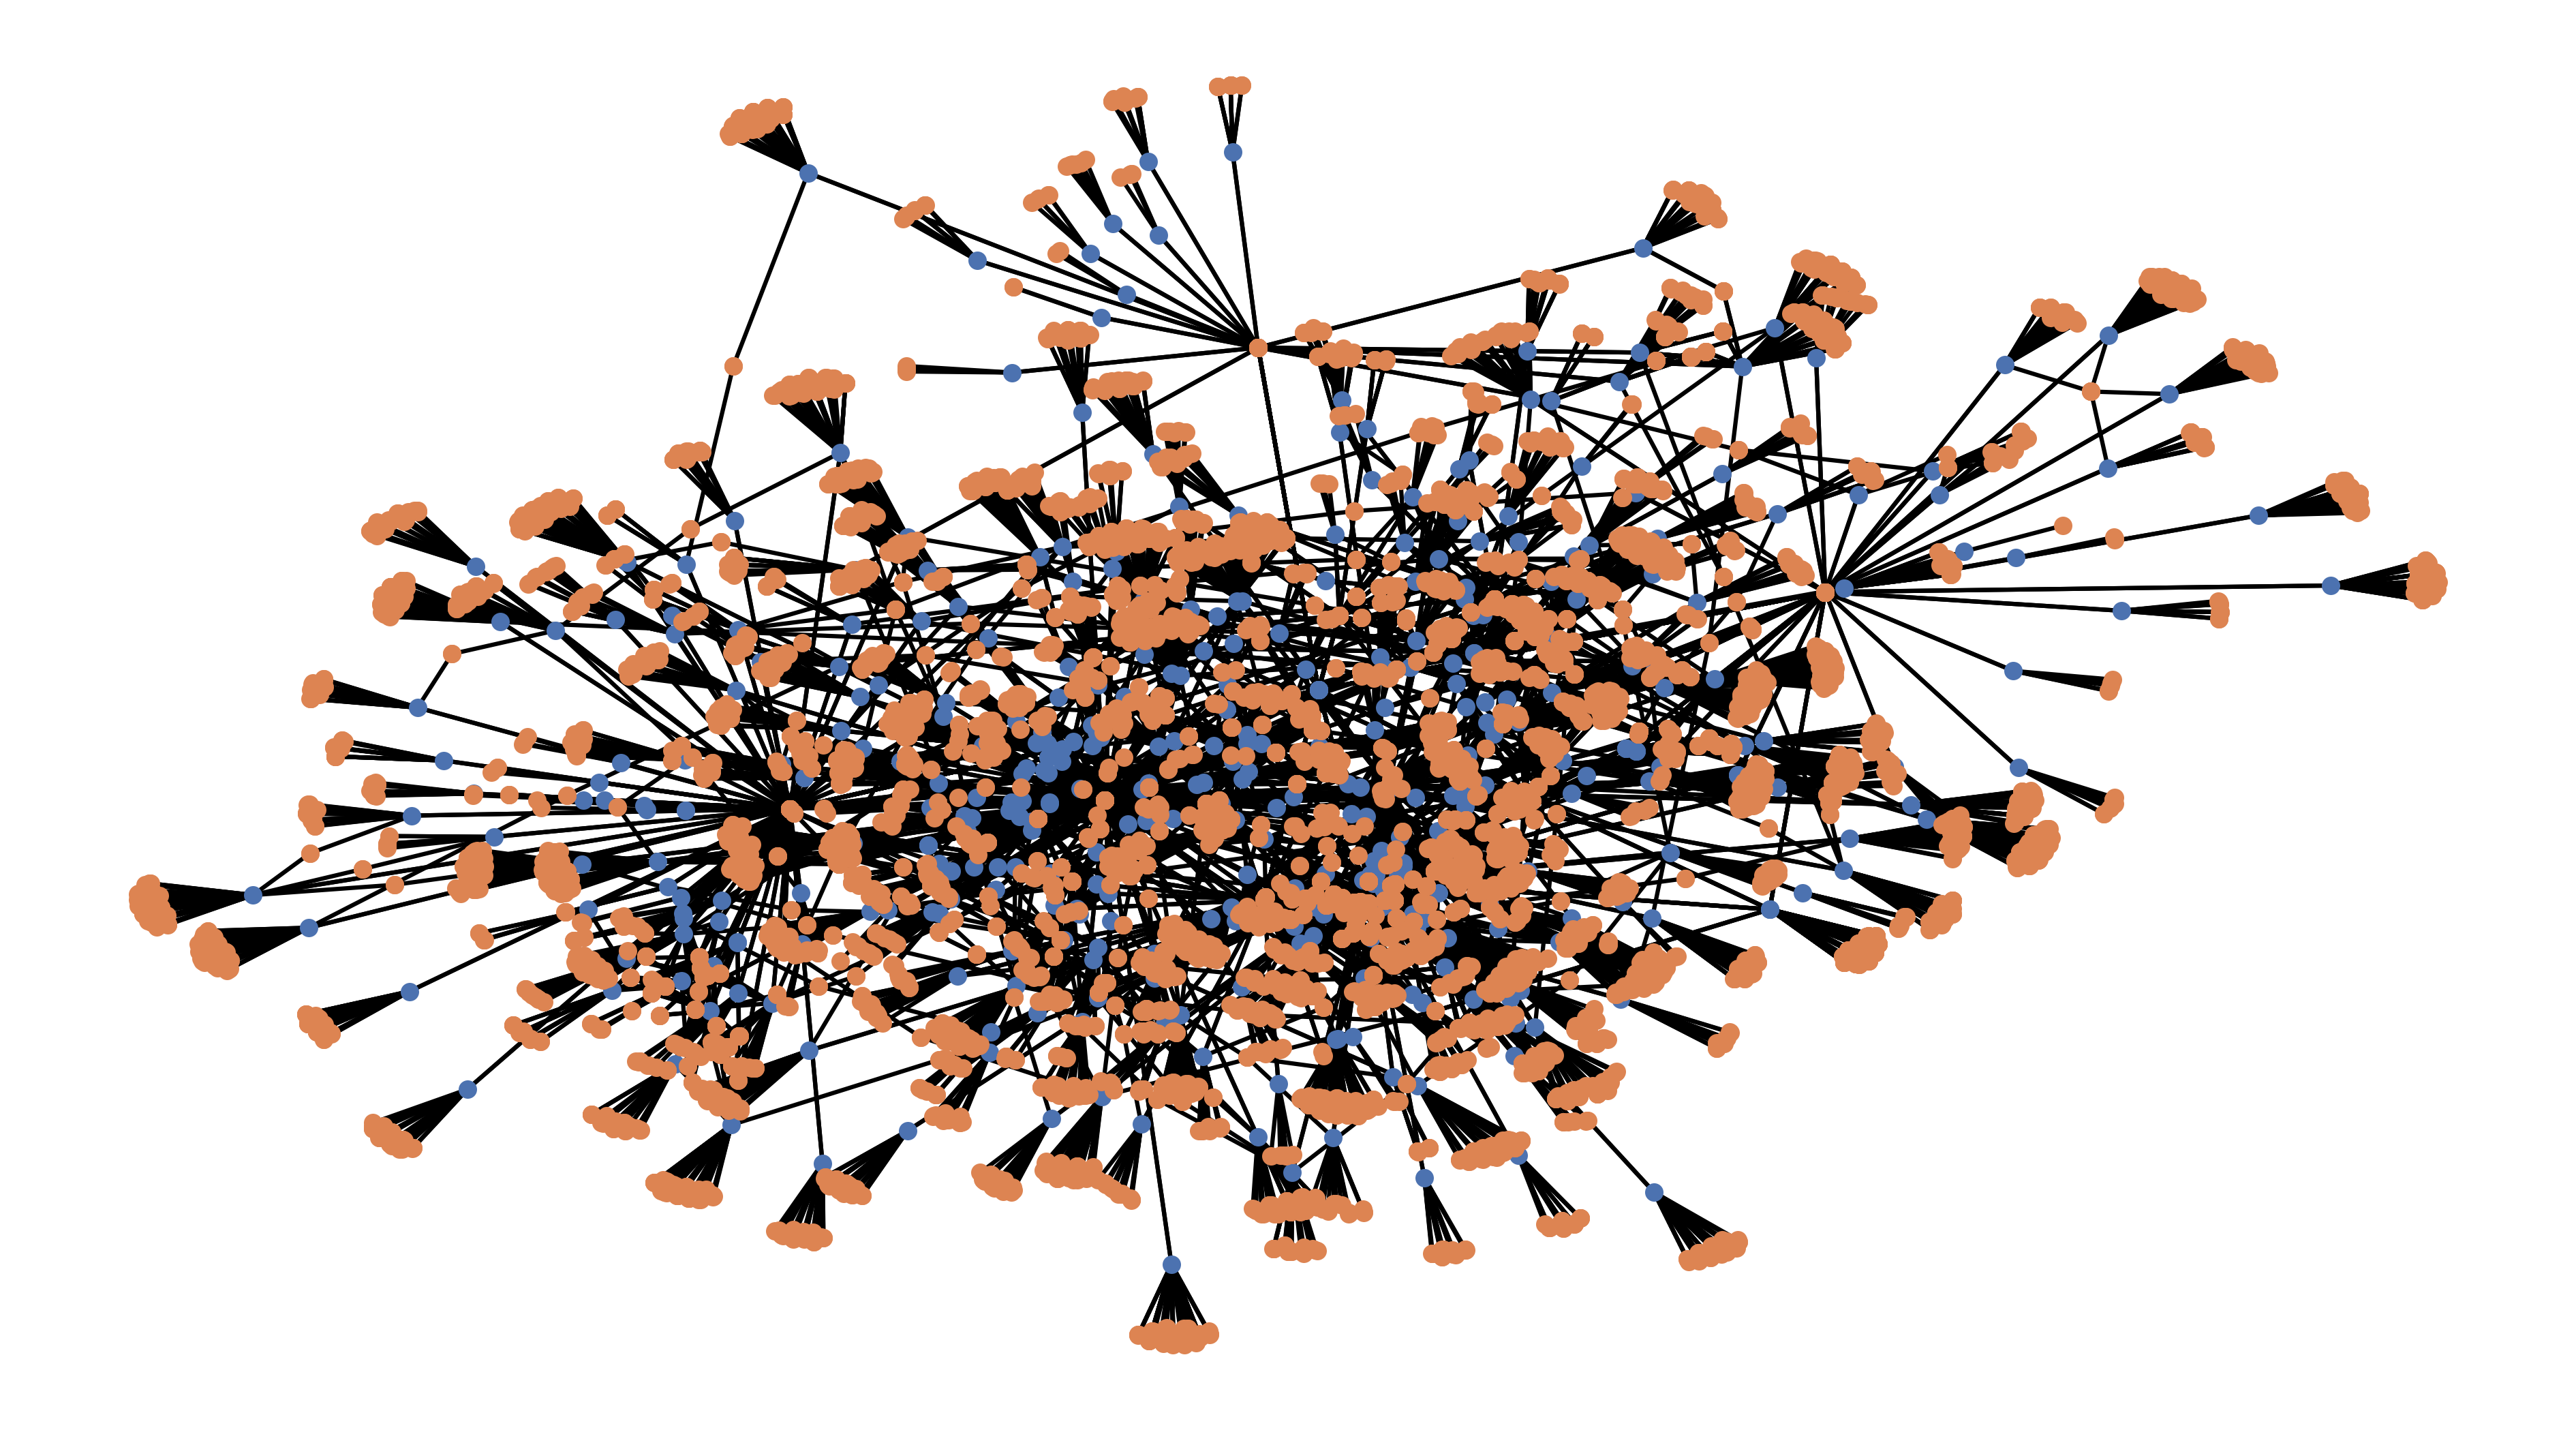

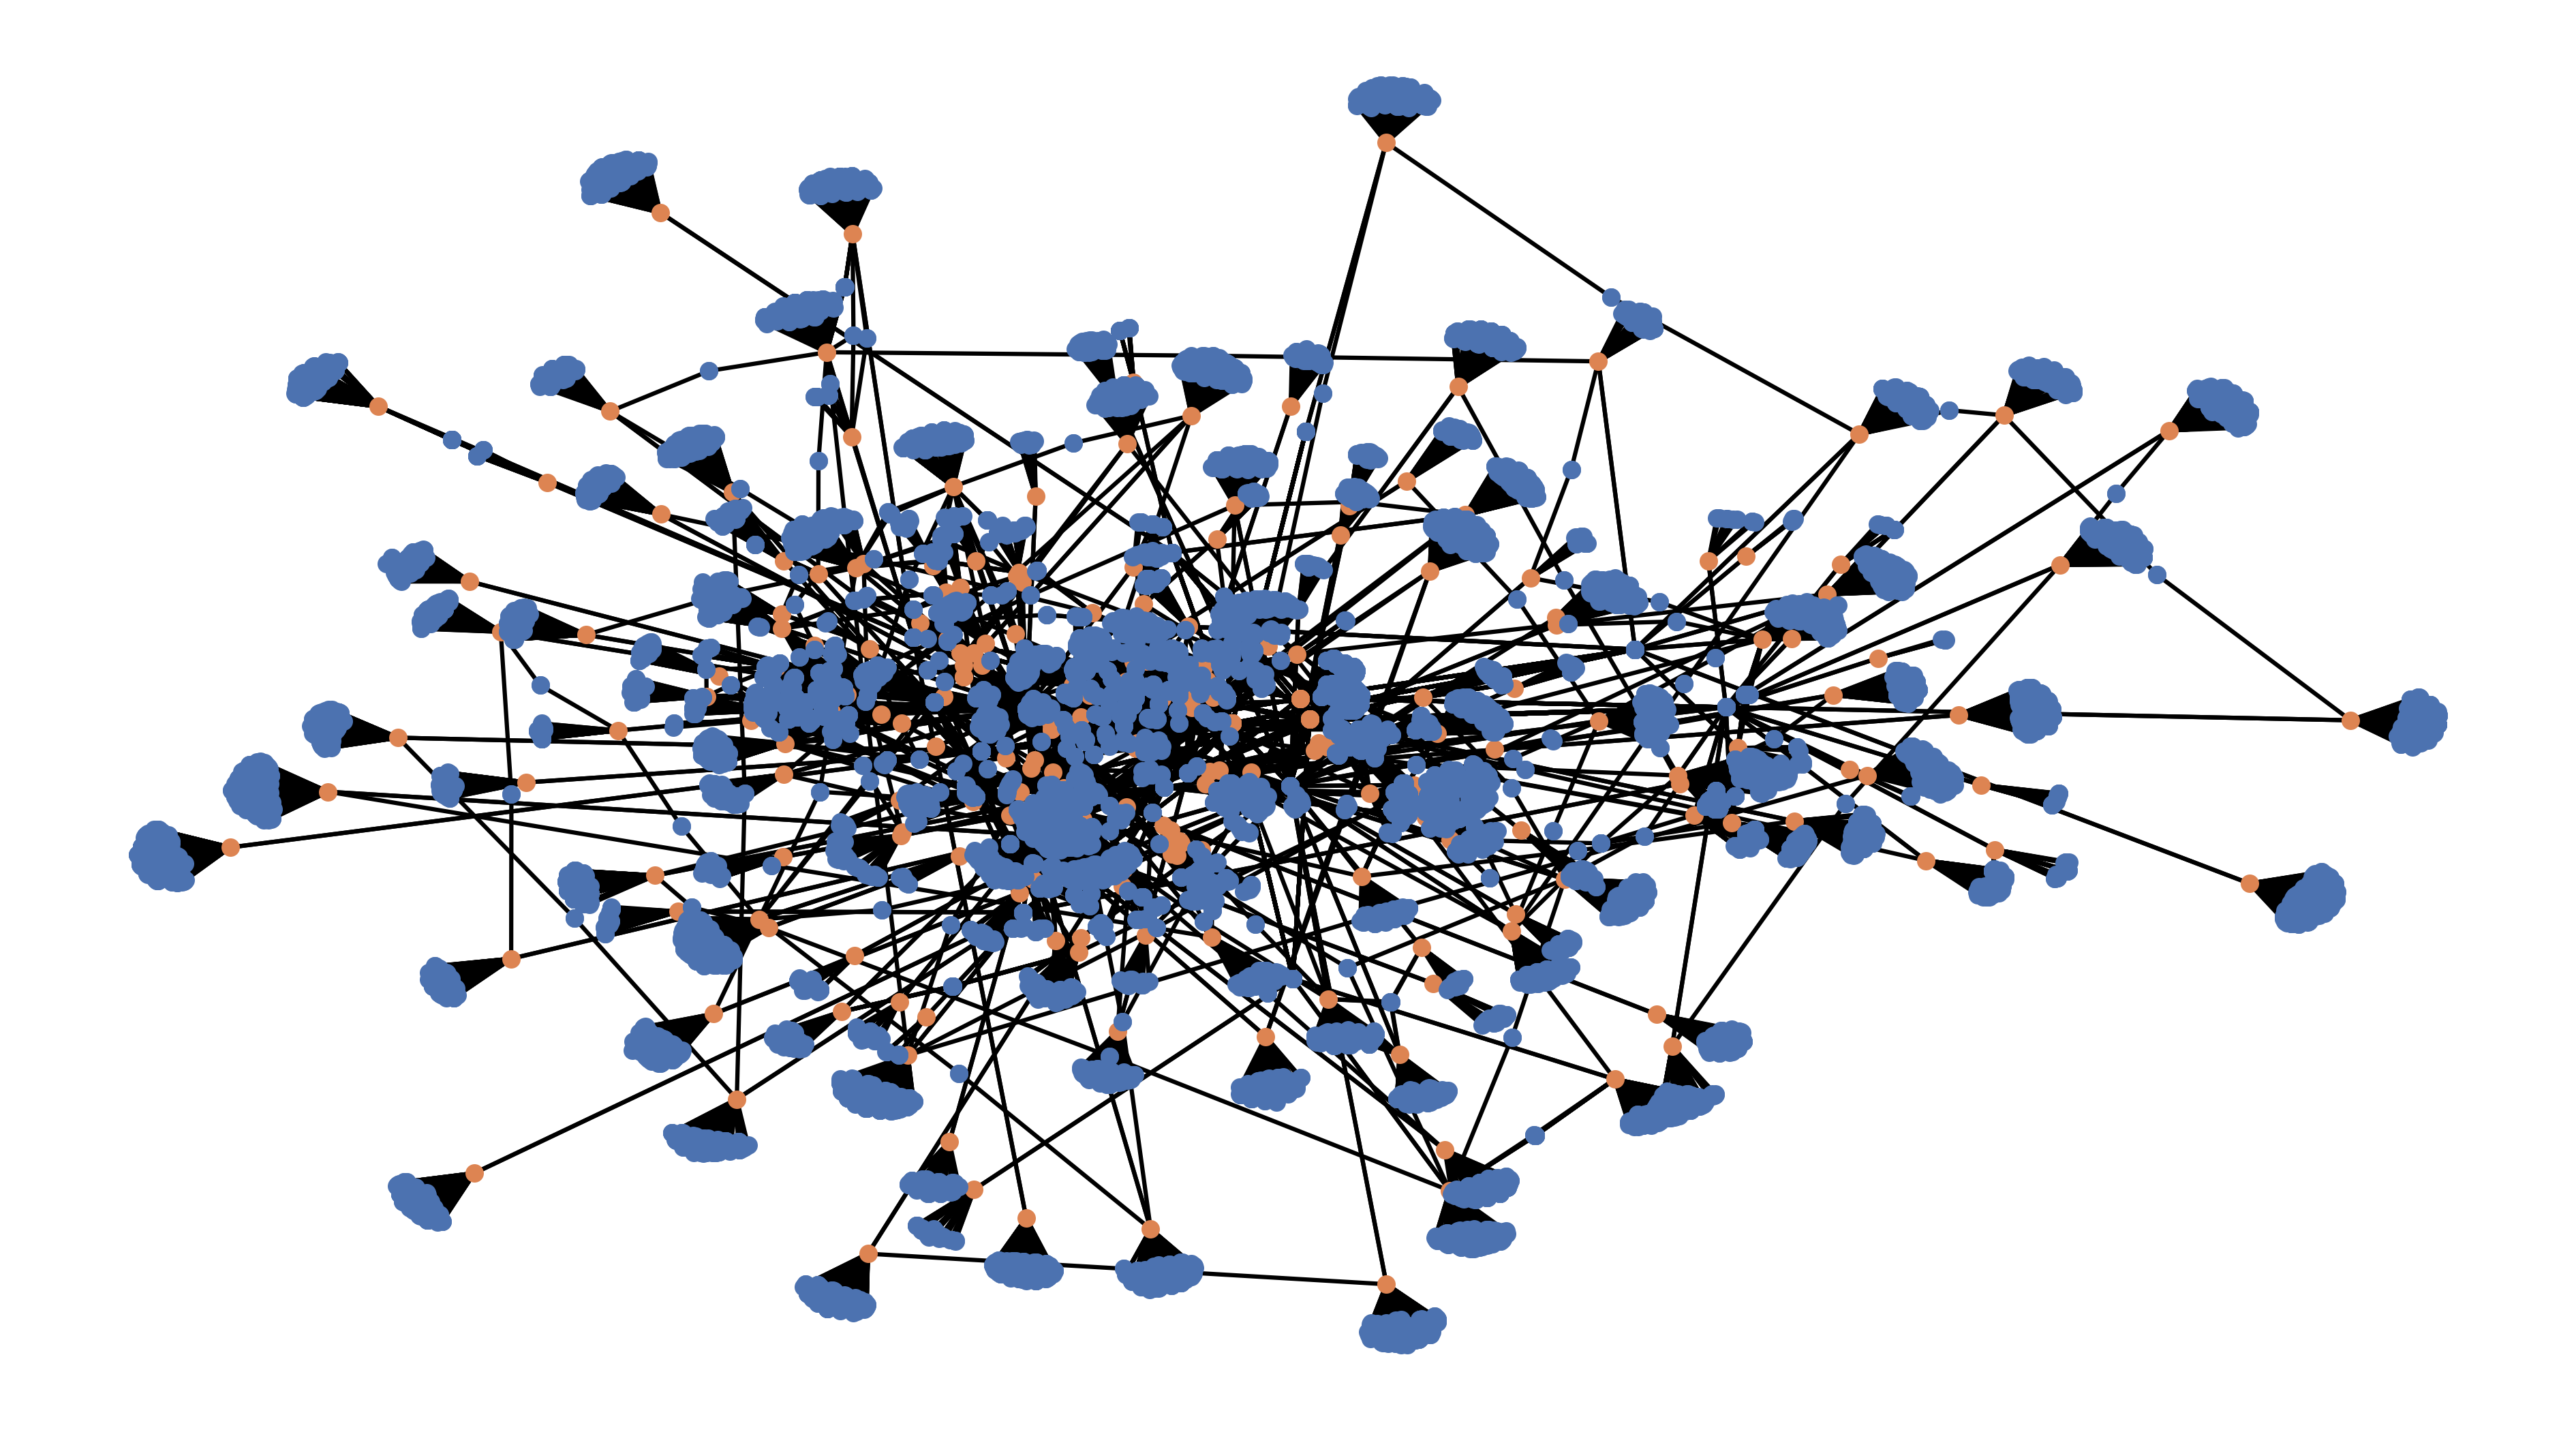

In [101]:
plot_sampled_graph('0d0f80a34807aab31a3521424d456d30bf2c93d9', df, 'user')
plot_sampled_graph('SOBNZDC12A6D4FC103', df, 'song')

In [131]:
random_user = df.sample()
ru, _, _ = random_user
print(random_user['user'])
random_song = df.sample()
print(random_song['song'])

1830500    ffe4266f7e11d1db56cdff8186f060cac27537b4
Name: user, dtype: object
4017507    SOCWWGH12A8C134A80
Name: song, dtype: object


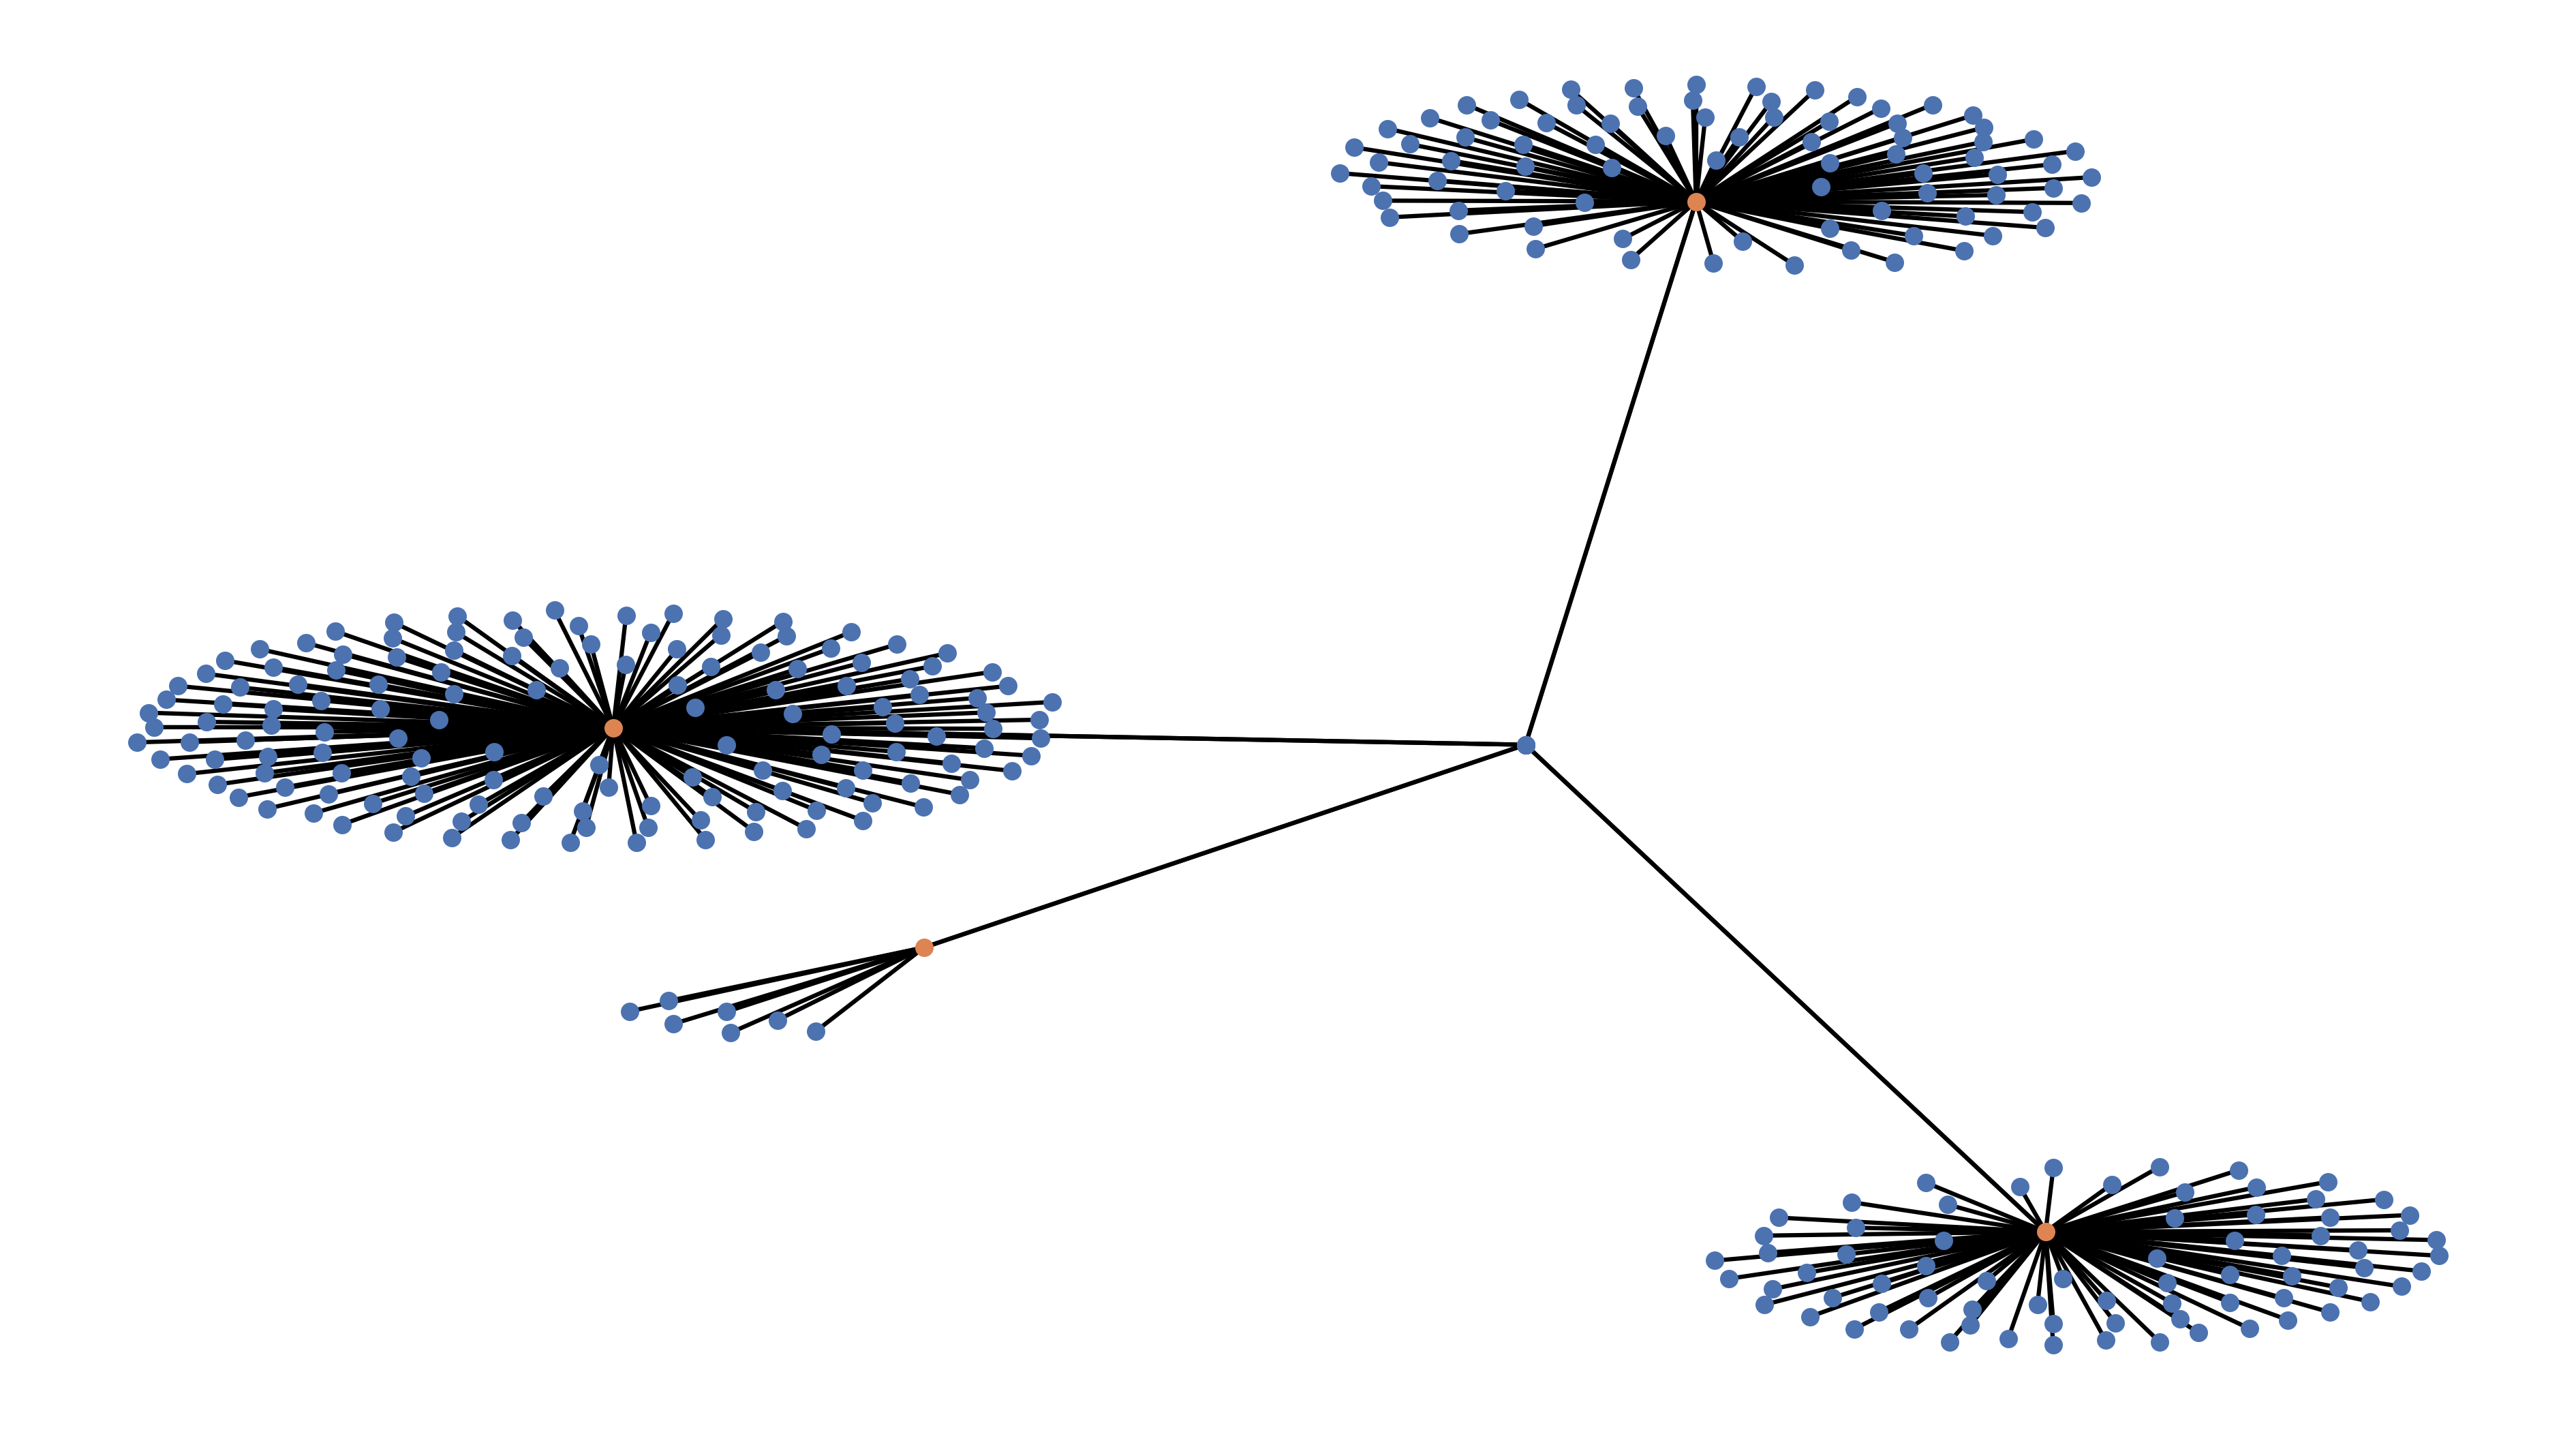

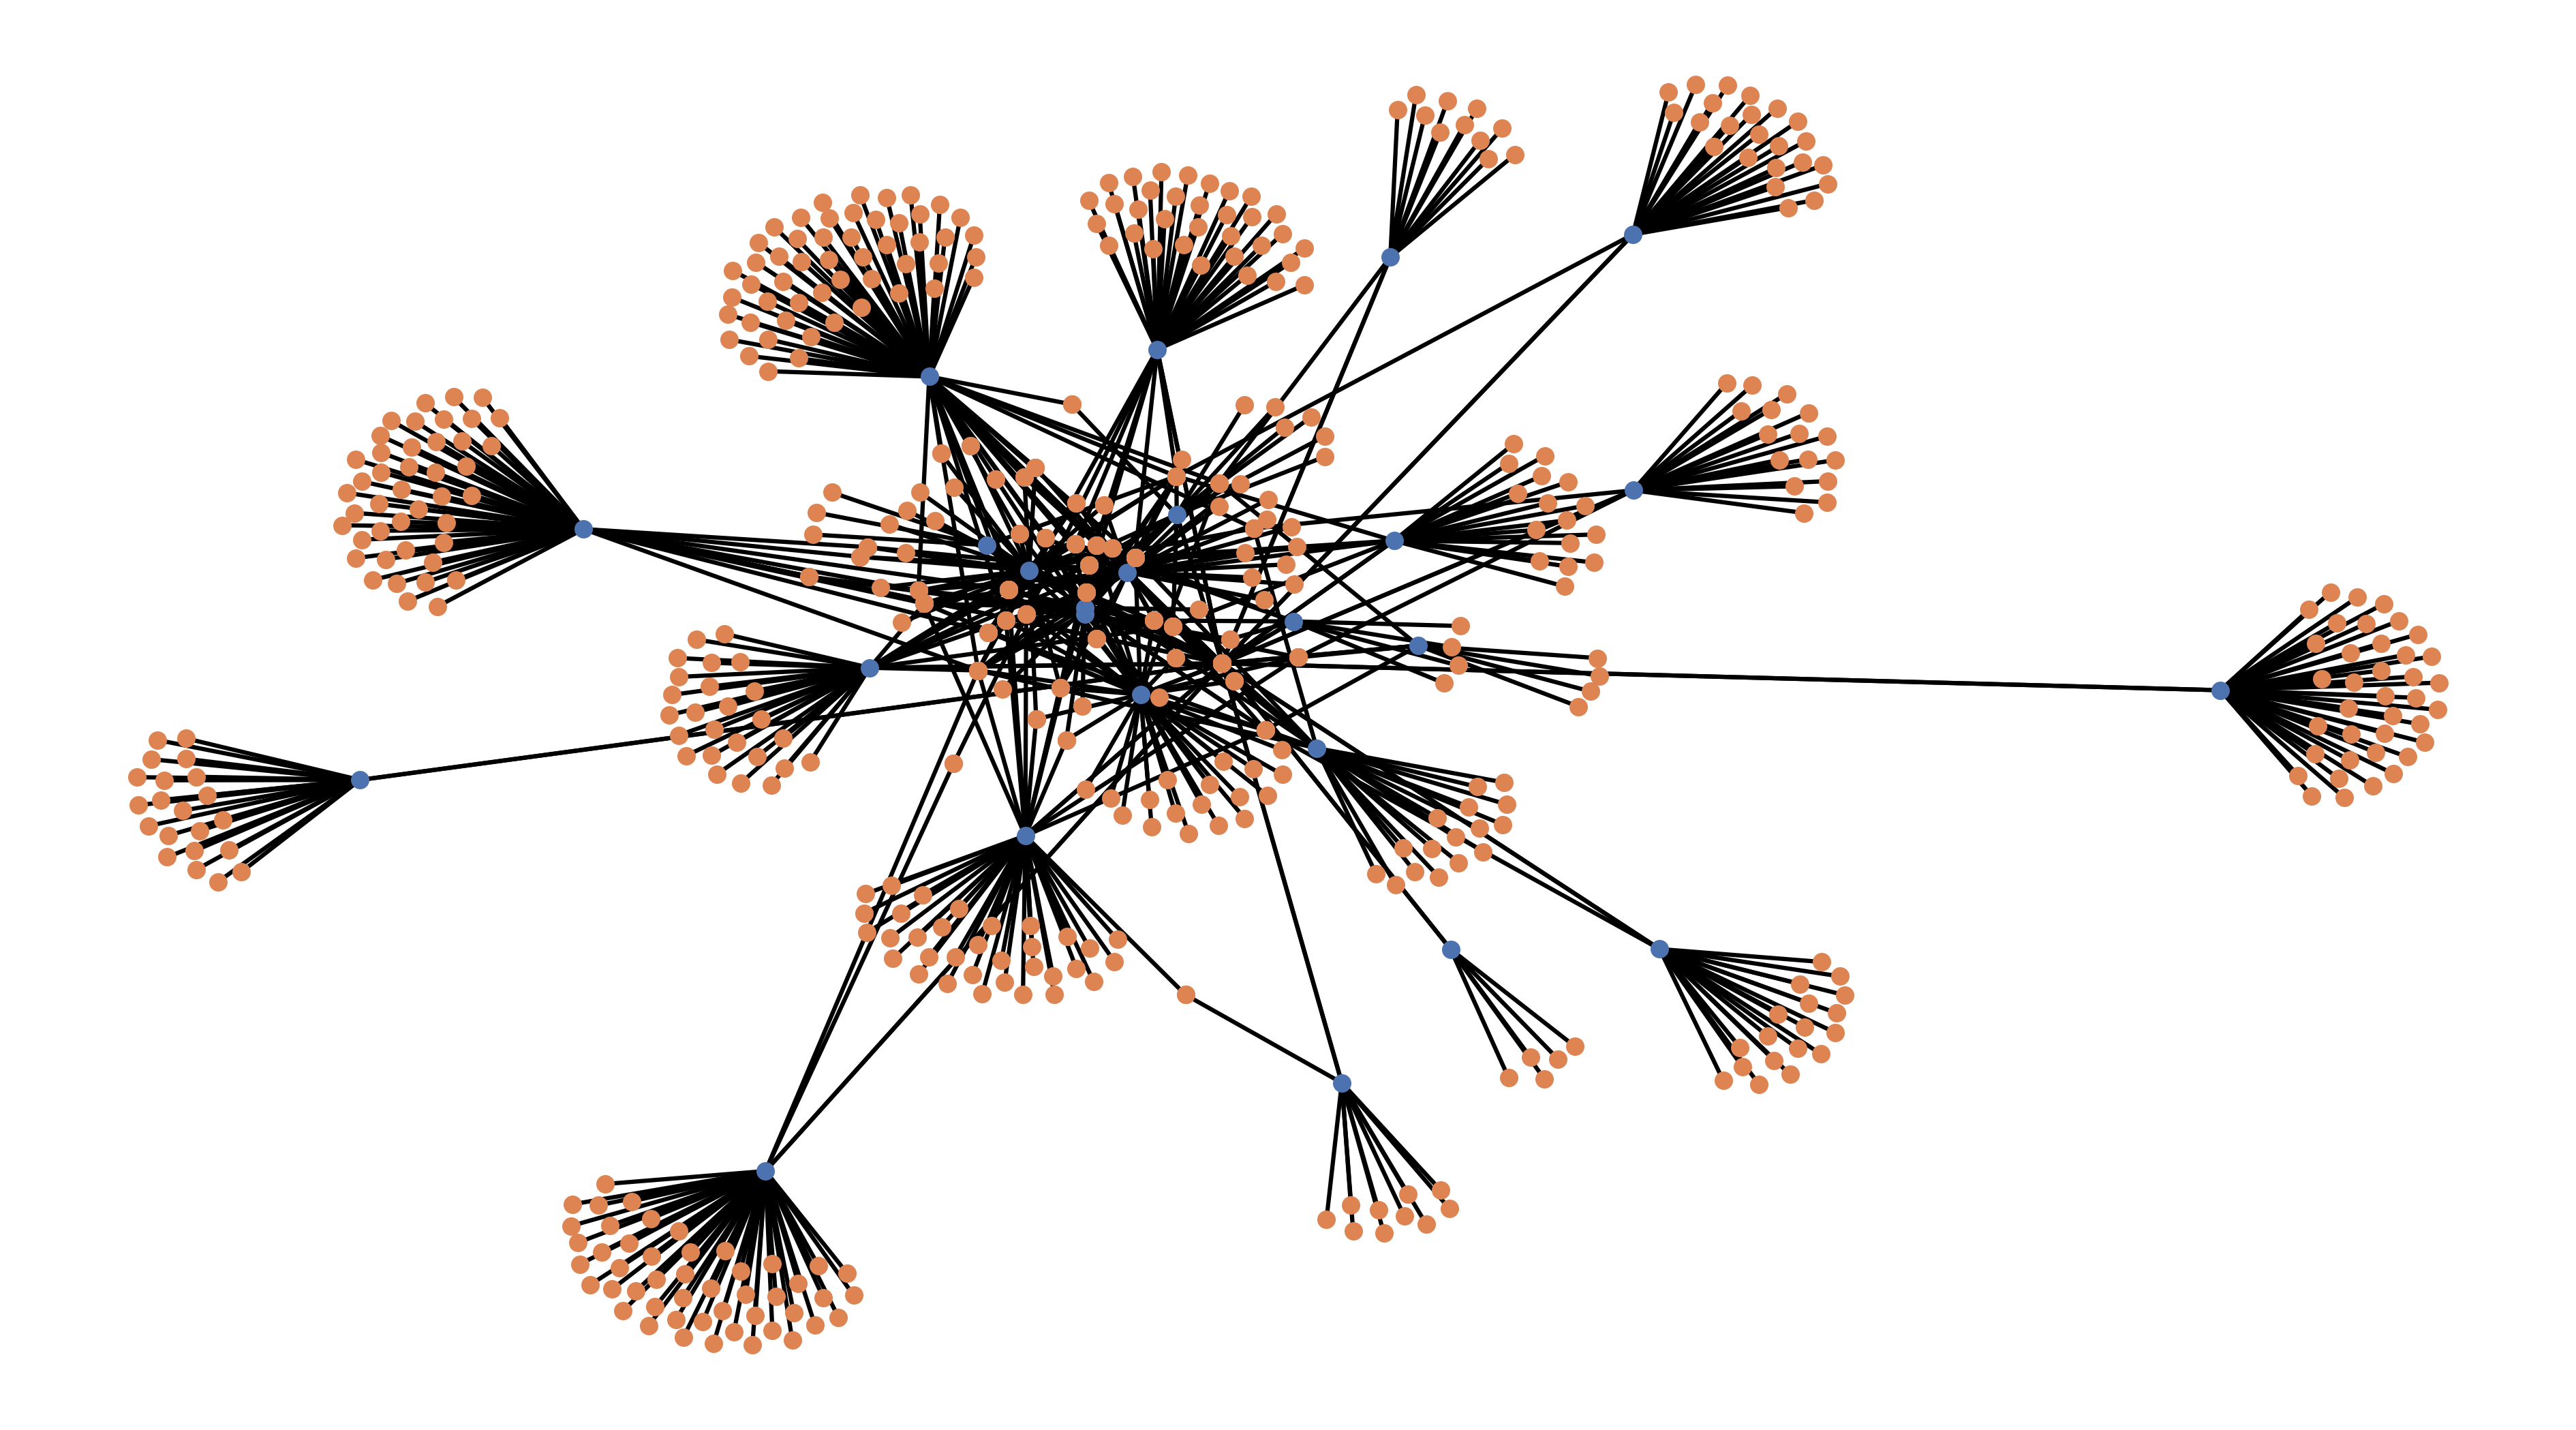

In [132]:
plot_sampled_graph('ffe4266f7e11d1db56cdff8186f060cac27537b4', df, 'user')
plot_sampled_graph('SOCWWGH12A8C134A80', df, 'song') #Cattle Decapitation - Lips & Assholes

In [ ]:
plot_sampled_graph('SOCWWGH12A8C134A80', df, 'song')